# can enlarging dataset make up for data corruption?

In [26]:
import re
from collections import defaultdict

# Initialize dictionary to store the data
data = defaultdict(lambda: defaultdict(dict))

# Read the file
file_path = 'save/can_enlarged_dataset_compensate/enlarge_dataset_summary.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the file
current_corruption_ratio = None
current_subset_ratio = None

for line in lines:
    line = line.strip()
    if line.startswith("corruption_ratio"):
        # Extract corruption_ratio and subset_ratio
        match = re.search(r'corruption_ratio = ([0-9.]+), subset_ratio = ([0-9.]+)', line)
        if match:
            current_corruption_ratio = float(match.group(1))
            current_subset_ratio = float(match.group(2))
    elif line and not line.startswith("GLUE score"):
        # Extract task and score
        parts = line.split()
        if len(parts) == 3:
            task, score = parts[1 :]
            try:
                score = float(score)
                # Store in the dictionary
                data[(current_corruption_ratio, current_subset_ratio)][task] = score
            except ValueError:
                pass

print(data)

defaultdict(<function <lambda> at 0x1255b4dc0>, {(0.0, 0.1): defaultdict(<class 'dict'>, {'cola': 0.398057, 'sst2': 0.900229, 'mrpc': 0.713235, 'stsb': 0.861132, 'qqp': 0.85862, 'mnli': 0.773714, 'qnli': 0.86436, 'rte': 0.592058, 'wnli': 0.56338}), (0.1, 0.1): defaultdict(<class 'dict'>, {'cola': 0.37304, 'sst2': 0.90367, 'mrpc': 0.713235, 'stsb': 0.813019, 'qqp': 0.84702, 'mnli': 0.756393, 'qnli': 0.835072, 'rte': 0.570397, 'wnli': 0.56338}), (0.1, 0.2): defaultdict(<class 'dict'>, {'cola': 0.450517, 'sst2': 0.916284, 'mrpc': 0.752451, 'stsb': 0.855343, 'qqp': 0.867351, 'mnli': 0.799389, 'qnli': 0.874794, 'rte': 0.570397, 'wnli': 0.43662}), (0.1, 0.3): defaultdict(<class 'dict'>, {'cola': 0.455784, 'sst2': 0.916284, 'mrpc': 0.718137, 'stsb': 0.858467, 'qqp': 0.877269, 'mnli': 0.806011, 'qnli': 0.884679, 'rte': 0.624549, 'wnli': 0.43662}), (0.1, 0.4): defaultdict(<class 'dict'>, {'cola': 0.468809, 'sst2': 0.916284, 'mrpc': 0.754902, 'stsb': 0.860738, 'qqp': 0.884022, 'mnli': 0.817117, 

In [27]:
# handle data
# compute glue score
'''
labels = ['CoLA', 'SST-2', 'MRPC', 'STS-B', 'QQP', 'MNLI', 'QNLI', 'RTE', 'WNLI', 'AVG']
labels2 = ['cola', 'sst2', 'mrpc', 'stsb', 'qqp', 'mnli', 'qnli', 'rte', 'wnli', 'glue']
# recompute the average ignoring the 'wnli'
scores_ignore_wnli = scores[:, :-2]
# substract the baseline values
scores_ignore_wnli[:, 1] = scores_ignore_wnli[:, 1] - 0.5  # SST2, index 1, binary classification
scores_ignore_wnli[:, 2] = scores_ignore_wnli[:, 2] - 0.5  # MRPC, index 2, binary classification
scores_ignore_wnli[:, 4] = scores_ignore_wnli[:, 4] - 0.5  # QQP, index 4, binary classification
scores_ignore_wnli[:, 5] = scores_ignore_wnli[:, 5] - 0.33333  # MNLI, index 5, tenary classification
scores_ignore_wnli[:, 6] = scores_ignore_wnli[:, 6] - 0.5  # QNLI, index 6, binary classification
scores_ignore_wnli[:, 7] = scores_ignore_wnli[:, 7] - 0.5  # RTE, index 7, binary classification
'''


for key, value in data.items():
    score = (data[key]['cola']
        + data[key]['sst2'] - 0.5
        + data[key]['mrpc'] - 0.5
        + data[key]['stsb']
        + data[key]['qqp'] - 0.5
        + data[key]['mnli'] -0.33333
        + data[key]['qnli'] - 0.5
        + data[key]['rte'] - 0.5
        ) / 8
    data[key]['score'] = score
print(data)

defaultdict(<function <lambda> at 0x1255b4dc0>, {(0.0, 0.1): defaultdict(<class 'dict'>, {'cola': 0.398057, 'sst2': 0.900229, 'mrpc': 0.713235, 'stsb': 0.861132, 'qqp': 0.85862, 'mnli': 0.773714, 'qnli': 0.86436, 'rte': 0.592058, 'wnli': 0.56338, 'score': 0.391009375}), (0.1, 0.1): defaultdict(<class 'dict'>, {'cola': 0.37304, 'sst2': 0.90367, 'mrpc': 0.713235, 'stsb': 0.813019, 'qqp': 0.84702, 'mnli': 0.756393, 'qnli': 0.835072, 'rte': 0.570397, 'wnli': 0.56338, 'score': 0.3723145}), (0.1, 0.2): defaultdict(<class 'dict'>, {'cola': 0.450517, 'sst2': 0.916284, 'mrpc': 0.752451, 'stsb': 0.855343, 'qqp': 0.867351, 'mnli': 0.799389, 'qnli': 0.874794, 'rte': 0.570397, 'wnli': 0.43662, 'score': 0.4066495}), (0.1, 0.3): defaultdict(<class 'dict'>, {'cola': 0.455784, 'sst2': 0.916284, 'mrpc': 0.718137, 'stsb': 0.858467, 'qqp': 0.877269, 'mnli': 0.806011, 'qnli': 0.884679, 'rte': 0.624549, 'wnli': 0.43662, 'score': 0.41348125}), (0.1, 0.4): defaultdict(<class 'dict'>, {'cola': 0.468809, 'sst2'

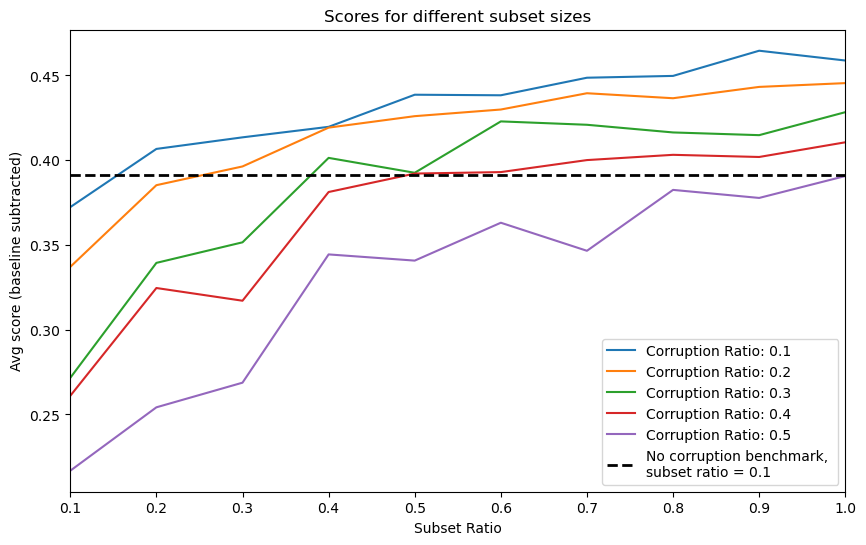

In [28]:
# plot
corruption_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
subset_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

import numpy as np
corruption_ratio_scores = np.zeros((len(corruption_ratios), len(subset_ratios)))
for i, corruption_ratio in enumerate(corruption_ratios):
    for j, subset_ratio in enumerate(subset_ratios):
        corruption_ratio_scores[i, j] = data[(corruption_ratio, subset_ratio)]['score']
        
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i, corruption_ratio in enumerate(corruption_ratios):
    plt.plot(subset_ratios, corruption_ratio_scores[i], label=f'Corruption Ratio: {corruption_ratio}')
plt.axhline(y=data[(0.0, 0.1)]['score'], color='black', linestyle='--', linewidth=2, label="No corruption benchmark, \nsubset ratio = 0.1")
plt.xlabel('Subset Ratio')
plt.ylabel('Avg score (baseline subtracted)')
plt.xlim(0.1, 1)
plt.title('Scores for different subset sizes')
plt.legend()
plt.show()